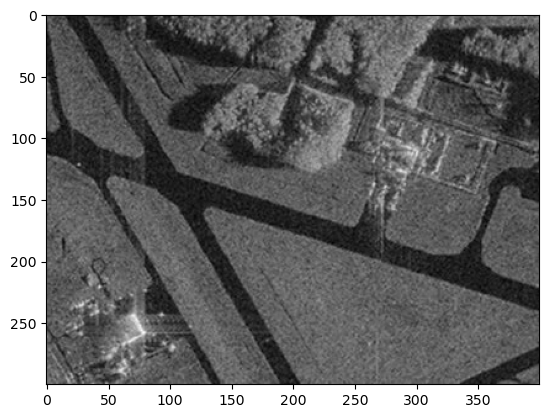

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
image = cv2.imread('sar_1_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

In [2]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255


15
21
35
60
60
78
96
103
107
129
144
173
155
172
173
198
217
293
234
253
257
265
290
282
206
196
200
204
225
230
230
251
264
482
260
266
256
234
229
252
282
246
231
253
233
235
235
233
236
228
220
227
231
208
203
222
199
187
175
165
167
162
157
137
141
155
148
127
122
118
110
108
98
83
68
63
67
63
60
70
66
53
51
50
46
45
48
43
46
44
39
37
560
48
43
48
43
42
36
34
27
22
28
28
27
23
21
23
25
21
20
19
20
19
15
11
12
11
8
5
3
3
2
1
2
0


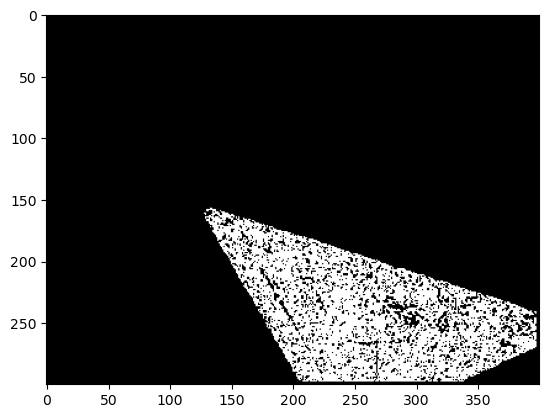

In [10]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,2, 10)
plt.imshow(mask, cmap="gray")

In [3]:
# new criteria function
def homo_new(img, mask, point, T):
    av_val = img[mask > 0]
                                                            
    med = np.median(av_val)
    
    return abs(med - img[point]) <= T

In [15]:
seed_point1 = (250,250)
mask1 = region_growing(image_gray,seed_point1,homo_new,5, 20)

91
257
415
565
733
901
1044
1205
1306
1054
1095
1073
1015
959
941
861
819
760
695
649
576
538
497
451
402
362
327
282
206
137
13
0


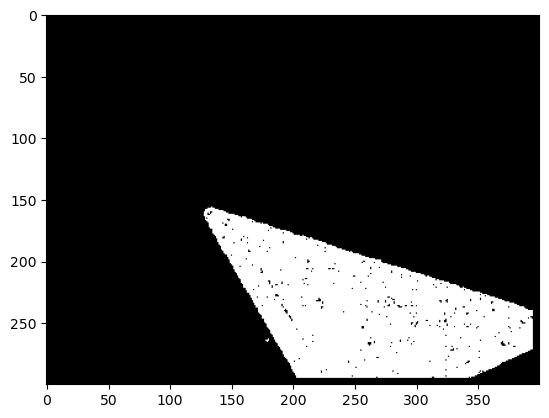

In [16]:

plt.imshow(mask1, cmap="gray")

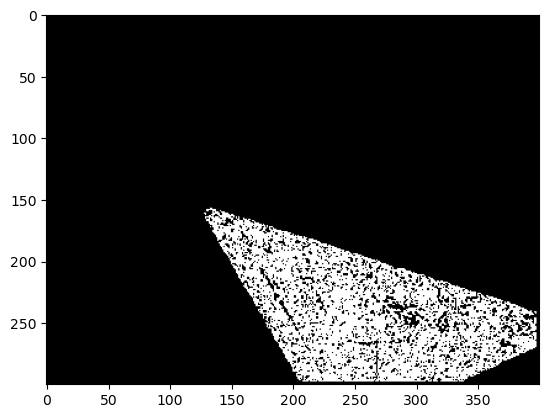

In [17]:
# Скорее всего, конкретно эту задачу можно решить с помощью бинаризации:
# сначала изображение бинаризируем, а весь алгоритм "разрастания регионов" можно
# заменить на простое копирование пикселей в "пустое" изображение, пока рядом
# с выбранными есть белые пиксели; изначально выбран пиксель seed_point
plt.imshow(mask, cmap="gray")

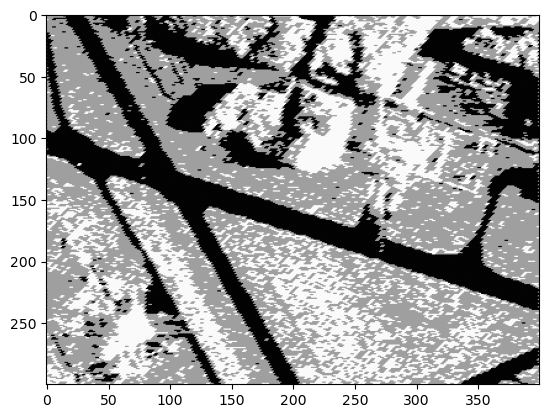

In [18]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.imshow(res2, cmap="gray")

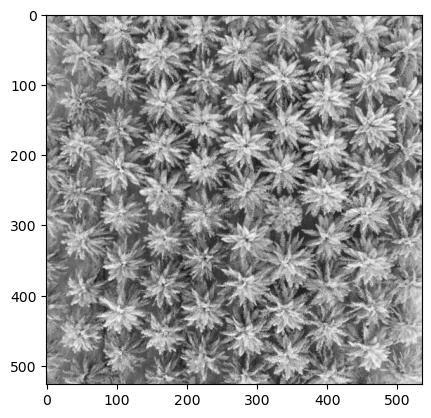

In [4]:
#----------------------
image = cv2.imread('palm_1.JPG')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

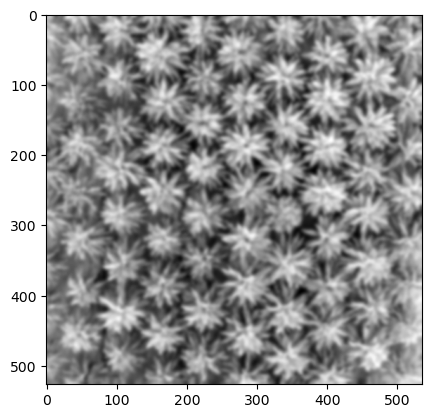

In [5]:
# размытие может отчасти помочь от резкости границ регионов
blured = cv2.GaussianBlur(image_gray, (13, 13), 0)
plt.imshow(blured, cmap="gray")

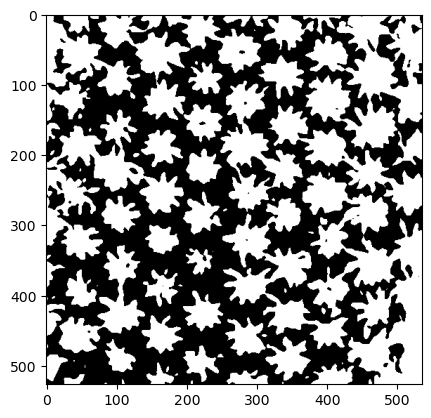

In [21]:
ret, thresh = cv2.threshold(blured,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray")

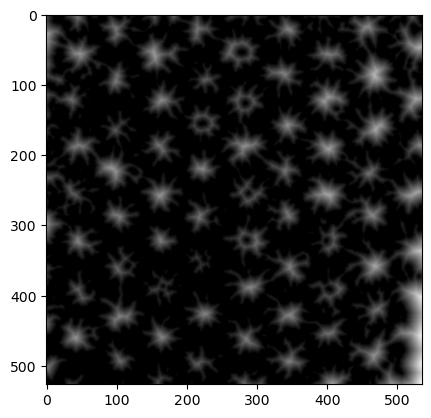

In [22]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 3) 
plt.imshow(dist, cmap="gray")

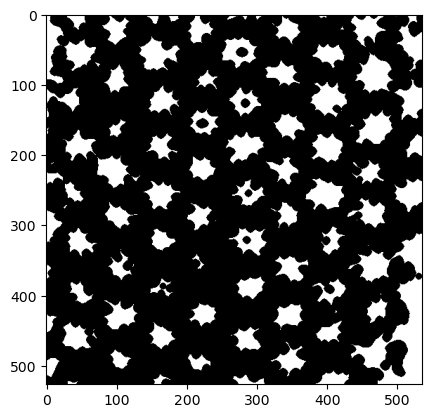

In [23]:
ret, sure_fg = cv2.threshold(dist, 0.15 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

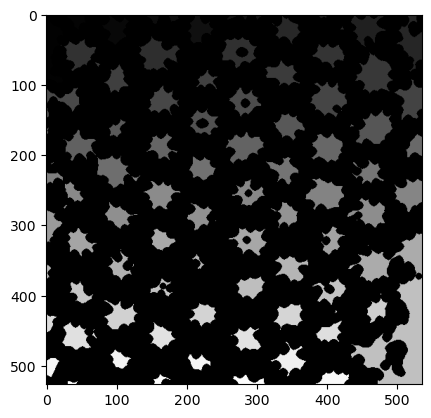

In [24]:
feasiblesure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(feasiblesure_fg) 
plt.imshow(markers, cmap="gray")

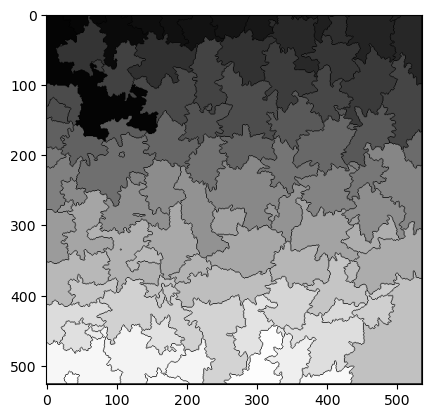

In [25]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")

In [26]:
palm_count = len(np.unique(markers)) - 1
print('the number of palms:', palm_count)

the number of palms: 118
